In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score,precision_recall_curve
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier



In [ ]:
df=pd.read_csv('/content/sample30.csv')

In [ ]:
df1=df[['reviews_text','user_sentiment']]

In [ ]:
df1=df1.dropna()

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# https://www.nltk.org/nltk_data/ from this link stopwords and wordnet is downloading  # noqa
nltk.download('wordnet')
nltk.download('stopwords')


def pre_process(row):
    # split into tokens by white space
    tokens = row.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # stemming of words
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in tokens]
    # lematizing of words
    lema = WordNetLemmatizer()
    lemmed = [lema.lemmatize(word) for word in stemmed]
    # filter out short tokens
    final = [word for word in lemmed if len(word) > 2]
    final = [word.lower() for word in final]
    return ' '.join(final)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df1['clean_text'] = df1['reviews_text'].apply(lambda x: pre_process(x))

In [ ]:
df1['reviews_text'][0]

"i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy."

In [ ]:
df1['clean_text'][0]

'love album good hip hop side current pop sound hype listen everyday gym give rate way metaphor crazi'

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df1['user_sentiment'])

df1['user_sentiment'] = le.transform(df1['user_sentiment'])
df1.head()

,reviews_text,user_sentiment,clean_text
0,i love this album. it's very good. more to the...,1,love album good hip hop side current pop sound...
1,Good flavor. This review was collected as part...,1,good flavor thi review collect part promot
2,Good flavor.,1,good flavor
3,I read through the reviews on here before look...,0,read review look buy one coupl lubric ultim di...
4,My husband bought this gel for us. The gel cau...,0,husband bought gel the gel caus irrit felt lik...


In [ ]:
data=df1[['clean_text','user_sentiment']]

In [ ]:
x = data['clean_text']
y = data['user_sentiment']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=42)

In [ ]:
#function for countvectrizer
def count_vectorizer(X_train, y_train, X_test, y_test):
   
    #creating the vectors
    count_vectorizer = CountVectorizer()
    X_train_vectors_count_vectorizer = count_vectorizer.fit_transform(X_train) 
    X_test_vectors_count_vectorizer = count_vectorizer.transform(X_test)


    #FITTING THE CLASSIFICATION MODEL using MultinomialNB(count_vectorizer)
    mnb_countv = RandomForestClassifier()
    mnb_countv.fit(X_train_vectors_count_vectorizer, y_train)  

    #Predict y value for test dataset
    y_predict = mnb_countv.predict(X_test_vectors_count_vectorizer)
    y_prob = mnb_countv.predict_proba(X_train_vectors_count_vectorizer)[:,1]
    print(classification_report(y_test,y_predict))
   
    print('accuracy:',accuracy_score(y_test,y_predict))

In [ ]:
count_vectorizer(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.85      0.35      0.49       967
           1       0.93      0.99      0.96      8033

    accuracy                           0.92      9000
   macro avg       0.89      0.67      0.73      9000
weighted avg       0.92      0.92      0.91      9000

accuracy: 0.9234444444444444


In [ ]:
#function for tf-id vectorizer
def tfidf_vectorizer(X_train, y_train, X_test, y_test):
   
    #creating the vectors
    tfidf_vectorizer = TfidfVectorizer(use_idf=True,max_df=0.5)
    X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
    X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)


    #FITTING THE CLASSIFICATION MODEL using MultinomialNB(tf-idf)
    mnb_tfidf = RandomForestClassifier()
    mnb_tfidf.fit(X_train_vectors_tfidf, y_train)  

    #Predict y value for test dataset
    predicted = mnb_tfidf.predict(X_test_vectors_tfidf)
    predicted_prob = mnb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
    #Predictprint(classification_report(y_test,y_predict))
    #print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

    #fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    #roc_auc = auc(fpr, tpr)
    #print('AUC:', roc_auc)
    #print('accuracy_score:',accuracy_score(y_test,y_predict))
    
    classes = np.unique(y_test)


    ## Accuracy, Precision, Recall
    accuracy = accuracy_score(y_test, predicted)
    #auc = roc_auc_score(y_test, predicted_prob, multi_class="ovo")
    print("Accuracy:",  round(accuracy,2))
    #print("Auc:", round(auc,2))
    print("Detail:")
    print(classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    #fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,8))
    
    plt.show()

Accuracy: 0.92
Detail:
              precision    recall  f1-score   support

           0       0.91      0.27      0.41       967
           1       0.92      1.00      0.96      8033

    accuracy                           0.92      9000
   macro avg       0.91      0.63      0.69      9000
weighted avg       0.92      0.92      0.90      9000



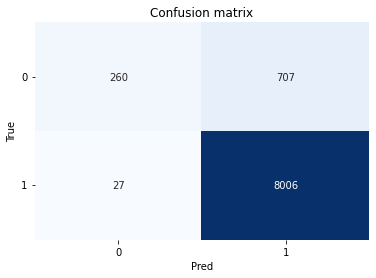

In [ ]:
#Calling TF-idf function
tfidf_vectorizer(X_train, y_train, X_test, y_test)

In [ ]:
#further tuning the 
def tfidf_vectorizer_tuning(X_train, y_train, X_test, y_test):
    parameters = {
    'max_df': (0.25, 0.5, 0.75),
    'ngram_range': [(1, 1), (1, 2), (1, 3),(2,1),(2,2),(2,3)],
        'use_idf':[True, False],
        'smooth_idf':(True, False),
        #'max_features':(None, 5000, 10000, 50000),
         'sublinear_tf':(True, False)
        
        }
    
    #pipeline = RandomizedSearchCV(TfidfVectorizer(),param_distributions = parameters, random_state = 123)
    grid_search_tune = GridSearchCV( TfidfVectorizer(), parameters, cv=2, n_jobs=2, verbose=3,scoring="accuracy")
    #grid_search_tune.fit(X_train,Y_train)
    
    
    #tfidf_vectorizer = TfidfVectorizer(use_idf=True,max_df=0.5)
    X_train_vectors_tfidf =  grid_search_tune.fit(X_train)
    X_train_vectors_tfidf =  grid_search_tune.transform(X_train) 
    
    X_test_vectors_tfidf =  grid_search_tune.transform(X_test)
    print(grid_search_tune.best_params_)
     
    
    #FITTING THE CLASSIFICATION MODEL using MultinomialNB(tf-idf)
    #mnb_tfidf = MultinomialNB() 
    #mnb_tfidf.fit(X_train_vectors_tfidf, y_train)  

    #Predict y value for test dataset
    #predicted =  mnb_tfidf.predict(X_test_vectors_tfidf)
    #predicted_prob =  mnb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
    
    
    
    #FITTING THE CLASSIFICATION MODEL using MultinomialNB(tf-idf)
    lr_tfidf = RandomForestClassifier()
    
    lr_tfidf .fit(X_train_vectors_tfidf, y_train)  

    #Predict y value for test dataset
    predicted =  lr_tfidf .predict(X_test_vectors_tfidf)
    predicted_prob =  lr_tfidf .predict_proba(X_test_vectors_tfidf)[:,1]
    #print(classification_report(y_test,y_predict))
    #print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

    #fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    #roc_auc = auc(fpr, tpr)
    #print('AUC:', roc_auc)
    #print('accuracy_score:',accuracy_score(y_test,y_predict)) 
    classes = np.unique(y_test)



    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test, predicted)
    #auc = metrics.roc_auc_score(y_test, predicted_prob,  multi_class="ovr")
    print("Accuracy:",  round(accuracy,2))
    #print("Auc:", round(auc,2))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)


    ## Plot roc
    #
    plt.show()

Fitting 2 folds for each of 144 candidates, totalling 288 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 678, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py", line 2053, in fit
    X = super().fit_transform(raw_documents)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py", line 1313, in fit_transform
    self._validate_params()
  File "/usr/local/lib/python3.7/dist-p

{'max_df': 0.25, 'ngram_range': (1, 1), 'smooth_idf': True, 'sublinear_tf': True, 'use_idf': True}
Accuracy: 0.91
Detail:
              precision    recall  f1-score   support

           0       0.89      0.22      0.35       967
           1       0.91      1.00      0.95      8033

    accuracy                           0.91      9000
   macro avg       0.90      0.61      0.65      9000
weighted avg       0.91      0.91      0.89      9000



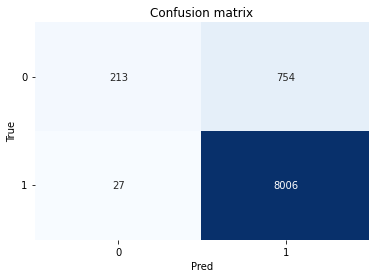

In [ ]:
tfidf_vectorizer_tuning(X_train, y_train, X_test, y_test)

# recommendation system 

creating pivottable with usernames,brand,reviews_rating

In [ ]:
moviemat = df.pivot_table(index='reviews_username',columns='brand',values='reviews_rating')
moviemat.head()

brand,4C Foods,AMBI,ANCHOR BAY,Africa's Best,Alberto VO5,All-Bran,Annie's,Arrid,Aussie,Australian Gold,...,Warner Music Group,Way Basics,Weather Tech,Weleda,Wilton,Windex,Yes to Carrots,Yes to Grapefruit,Yosemite Home Decor,iStarUSA
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


for example user selects  brand disney

In [ ]:
user_selection = moviemat['Disney']
user_selection

reviews_username
00dog3     NaN
00sab00    NaN
01impala   NaN
02dakota   NaN
02deuce    NaN
            ..
zxcsdfd    NaN
zxjki      NaN
zyiah4     NaN
zzdiane    NaN
zzz1127    NaN
Name: Disney, Length: 24914, dtype: float64

calculating coorelation with disney and other brands with user

In [ ]:
similar_to_user_selection = moviemat.corrwith(user_selection)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
similar_to_user_selection

brand
4C Foods                    NaN
AMBI                        NaN
ANCHOR BAY                  NaN
Africa's Best               NaN
Alberto VO5                 NaN
                         ...   
Windex                -0.328798
Yes to Carrots              NaN
Yes to Grapefruit           NaN
Yosemite Home Decor         NaN
iStarUSA                    NaN
Length: 214, dtype: float64

In [ ]:
corr_user = pd.DataFrame(similar_to_user_selection,columns=['Correlation'])
corr_user.dropna(inplace=True)
corr_user.head()



,Correlation
brand,
Chester's,-0.112680
Chips Ahoy,0.533002
Clear Scalp & Hair Therapy,-0.333333
Clorox,0.636285
Coty,-0.240192


printing top brands with cooleated to uset selected brand

In [ ]:

corr_user.sort_values('Correlation',ascending=False).head(20)

,Correlation
brand,
Disney,1.000000
Clorox,0.636285
Chips Ahoy,0.533002
Pendaflex,0.487950
Hormel,0.436436
Nexxus,0.263718
Warner Home Video,0.245371
Universal Home Video,0.107182
Warner Music Group,0.008989
